In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [6]:
# Import the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

In [8]:
print("Shape of X_train:", X_train.shape)
X_train[0:10]   #3D array, 60000 images, 28x28 pixels

Shape of X_train: (60000, 28, 28)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
X_reshaped_train = X_train.reshape(60000, 784)    # rows=60k       , columns= 784
print(X_reshaped_train.shape )                    # each row 1 img , each column nth pixel of each image

X_reshaped_train=X_reshaped_train.T                                # rows=784                        , columns= 60k
X_reshaped_train.shape                          # each row nth pixel of each image, each column 1 image
# 

(60000, 784)


(784, 60000)

In [10]:
print(y_train.shape) # do not reshape y_train because?
y_train[0]

(60000,)


np.uint8(5)

In [11]:
X_reshaped_test = X_test.reshape(10000, 784).T
X_reshaped_test.shape                        

(784, 10000)

In [12]:
y_test.shape

(10000,)

In [13]:
def init_params():   
    W1 = np.random.randn(64, 784) * np.sqrt(1. / 784)
    b1 = np.zeros((64, 1))
    W2 = np.random.randn(10, 64) * np.sqrt(1. / 64)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

In [14]:
# def init_params():
#     W1=np.random.rand(64,784)*0.01 - 0.005  # small random values
#     b1=np.random.rand(64,1)*0.01 - 0.005
#     W2=np.random.rand(10,64)*0.01 - 0.005
#     b2=np.random.rand(10,1)*0.01 - 0.005
#     return W1, b1, W2, b2

In [15]:
def ReLU(Z):                       #OR DO
   Z=np.maximum(0,Z)               # if (Z>0):              
                                   #    Z=Z                
   return Z                        # else:
                                   #    Z=0

In [16]:
def deriv_ReLU(Z):                  #OR DO
    return Z > 0                    # if (Z>0):
                                    #    return 1
                                    # else:
                                    #    return 0

In [17]:
deriv_ReLU(4)

True

In [18]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # for numerical stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)

In [19]:
# def softmax(Z):
#     return np.exp(Z)/np.sum(np.exp(Z))
     

In [20]:
def forward_prop(W1, b1, W2, b2, X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2

In [21]:
def one_hot(y):
    one_hot=np.zeros((y.size, y.max()+1))
    one_hot[np.arange(y.size), y]=1        #np.arange(y.size) = [0, 1, 2] , y = [2, 0, 1],
                                           #one_hot[0, 2] = 1  # for y[0] = 2
                                           #[[0. 0. 1.], ....]
    
    return one_hot.T                      #EK COL MAI EK IMG KI DETAIL HOGI(har jgh 0, bas uss row mai 1 hoga jo uska label hai )
                                           


In [22]:
def backprop(Z1, A1, Z2, A2, W2, X, Y):
    m=Y.size
    one_hot_Y = one_hot(Y)                # convert Y to one-hot encoding
    dZ2 = A2 - one_hot_Y                  # derivative of loss w.r.t. Z2   
    dW2 = (1/m) * dZ2.dot(A1.T)           # derivative of loss w.r.t. W2
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) # (1/m) * np.sum(dZ2,2)  # derivative of loss w.r.t. b2
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)  # derivative of loss w.r.t. Z1
    dW1 = (1/m) * dZ1.dot(X.T)           # derivative of loss w.r.t. W1
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) #(1/m) * np.sum(dZ2,2) (1/m) * np.sum(dZ2,2)  # derivative of loss w.r.t. b1

    return dW1, db1, dW2, db2

In [23]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate=0.01):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [24]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [25]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

In [26]:
def gradient_descent(X, Y, epochs=1000,learning_rate=0.01,):
    W1, b1, W2, b2 = init_params()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if i % 50 == 0:
            print("epochs:",i)
            print("accuracy:", get_accuracy(get_predictions(A2), Y))
    
    return W1, b1, W2, b2


In [27]:
W1, b1, W2, b2 = gradient_descent(X_reshaped_train, y_train, 501, 0.01 )

epochs: 0
accuracy: 0.09848333333333334
epochs: 50
accuracy: 0.35113333333333335
epochs: 100
accuracy: 0.58175
epochs: 150
accuracy: 0.6776333333333333
epochs: 200
accuracy: 0.7217833333333333
epochs: 250
accuracy: 0.7474
epochs: 300
accuracy: 0.7699833333333334
epochs: 350
accuracy: 0.7891833333333333
epochs: 400
accuracy: 0.8042833333333334
epochs: 450
accuracy: 0.81635
epochs: 500
accuracy: 0.8259666666666666


In [28]:
preds = get_predictions(forward_prop(W1, b1, W2, b2, X_reshaped_train)[-1])
print(np.unique(preds, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([6168, 7654, 5792, 6596, 5788, 3570, 6245, 6313, 5880, 5994]))


In [40]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_reshaped_train[:, index, None]
    prediction = make_predictions(X_reshaped_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [6]
Label:  6


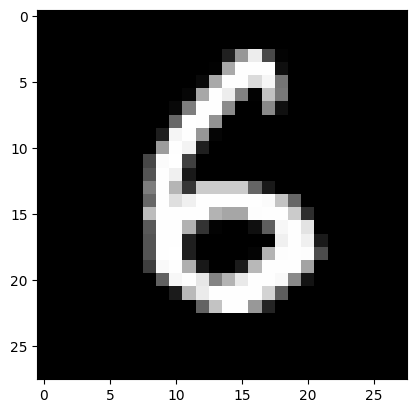

In [45]:
test_prediction(106, W1, b1, W2, b2)  # Test with the first image

In [46]:
test_pred=make_predictions(X_reshaped_test, W1, b1, W2, b2)
print(get_accuracy(test_pred, y_test))

0.8369
